In [1]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))   
%load_ext autoreload
%autoreload 1

Author: Andrew Tarzia

Date Created: 12 Jul 2018

License:

# Notebook for getting molecule parameters using RDKIT


In [2]:
import numpy as np
import pandas as pd
from IPython.display import display_pdf
import os
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Descriptors3D import NPR1, NPR2, PMI1, PMI2, PMI3
from rdkit.Chem.Draw.MolDrawing import MolDrawing
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Geometry import rdGeometry
from rdkit.Chem import PyMol
from rdkit import Geometry
import tempfile
import matplotlib.pyplot as plt
%aimport rdkit_functions
%aimport ellipsoid

# Notes:
# Todo:
- timing
 - speed up reading: https://rdkit.blogspot.com/2016/09/avoiding-unnecessary-work-and.html

In [3]:
# molecule file dir
molecule_file = '/home/atarzia/psp/linBmolecules/linbmolecules.txt'
# output dir
output_dir = '/home/atarzia/psp/linBmolecules/'

In [4]:
def define_plot_variables(ax, title, ytitle, xtitle, xlim, ylim):
    """
    Series of matplotlib pyplot settings to make all plots unitform.
    """
    # Set number of ticks for x-axis
    ax.tick_params(axis='both', which='major', labelsize=16)

    ax.set_ylabel(ytitle, fontsize=16)
    # ax.legend([y, n], ['aligned', 'not aligned'], loc=4, fancybox=True)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticklabels(['diffuses', 'does not diffuse'])
    ax.set_xticks([0.25, 0.75])


def define_parity_plot_variables(ax, title, ytitle, xtitle, xlim, ylim):
    """
    Series of matplotlib pyplot settings to make all plots unitform.
    """
    # Set number of ticks for x-axis
    ax.tick_params(axis='both', which='major', labelsize=16)

    ax.set_xlabel(xtitle, fontsize=16)
    ax.set_ylabel(ytitle, fontsize=16)
    # ax.legend([y, n], ['aligned', 'not aligned'], loc=4, fancybox=True)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


In [5]:
df, molecules, diameters = rdkit_functions.read_mol_txt_file(molecule_file)
rdkit_functions.produce_quick_fig_mol(molecules, output_dir+'molecules.pdf')

/home/atarzia/psp/linBmolecules/molecules_1.pdf
/home/atarzia/psp/linBmolecules/molecules_2.pdf


## Calculate size and shape

In [6]:
try:
    v = PyMol.MolViewer()
except ConnectionRefusedError:
    pass

In [7]:
molecules

{'1,1,1-trichloroethane': 'CC(Cl)(Cl)Cl',
 '1,1,2,2,-tetrachloroethane': 'C(C(Cl)Cl)(Cl)Cl',
 '1,1-dichloroethane': 'CC(Cl)Cl',
 '1,2-dibromoethane': 'C(CBr)Br',
 '1,2-dibromopropane': 'CC(CBr)Br',
 '1,2-dichloroethane': 'C(CCl)Cl',
 '1,3-dichloropropane': 'C(CCl)CCl',
 '1,4-dichlorobutane': 'C(CCCl)CCl',
 '1,6-dichlorohexane': 'C(CCCCl)CCCl',
 '1,9-dichlorononane': 'C(CCCCCl)CCCCCl',
 '1-bromobutane': 'CCCCBr',
 '1-bromoethane': 'CCBr',
 '1-chlorobutane': 'CCCCCl',
 '1-chlorodecane': 'CCCCCCCCCCCl',
 '1-chlorododecane': 'CCCCCCCCCCCCCl',
 '1-chloroheptane': 'CCCCCCCCl',
 '1-chlorohexane': 'CCCCCCCl',
 '1-chlorononane': 'CCCCCCCCCCl',
 '1-chlorooctane': 'CCCCCCCCCl',
 '1-chloropentane': 'CCCCCCl',
 '1-chloropropane': 'CCCCl',
 '2-chlorobutane': 'CCC(C)Cl',
 '2-chlorobutyric acid': 'CCC(C(=O)O)Cl',
 '2-chloroethanol': 'C(CCl)O',
 '2-chlorooctane': 'CCCCCCC(C)Cl',
 '2-chloropropionic acid': 'CC(C(=O)O)Cl',
 '3-chlorobutyric acid': 'CC(CC(=O)O)Cl',
 '3-chlorohexane': 'CCCC(CC)Cl',
 '3-chl

In [8]:
rdkit_functions.calc_molecule_diameters(molecules, diameters, 
                                        out_dir=output_dir, vdwScale=1.0, boxMargin=4.0,
                                        spacing=0.6, show_vdw=False, plot_ellip=False,
                                        N_conformers=50, 
                                        show_conf=False)

molecule: 1-chloropropane : SMILES: CCCCl
1 out of 34 done
molecule: 1-chlorobutane : SMILES: CCCCCl
2 out of 34 done
molecule: 1-chloropentane : SMILES: CCCCCCl
3 out of 34 done
molecule: 1-chlorohexane : SMILES: CCCCCCCl
4 out of 34 done
molecule: 1-chloroheptane : SMILES: CCCCCCCCl
5 out of 34 done
molecule: 1-chlorooctane : SMILES: CCCCCCCCCl
6 out of 34 done
molecule: 1-chlorononane : SMILES: CCCCCCCCCCl
7 out of 34 done
molecule: 1-chlorodecane : SMILES: CCCCCCCCCCCl
8 out of 34 done
molecule: 1-chlorododecane : SMILES: CCCCCCCCCCCCCl
9 out of 34 done
molecule: 2-chlorobutane : SMILES: CCC(C)Cl
10 out of 34 done
molecule: 2-chlorooctane : SMILES: CCCCCCC(C)Cl
11 out of 34 done
molecule: 3-chlorohexane : SMILES: CCCC(CC)Cl
12 out of 34 done
molecule: dichloromethane : SMILES: C(Cl)Cl
13 out of 34 done
molecule: 1,2-dichloroethane : SMILES: C(CCl)Cl
14 out of 34 done
molecule: 1,3-dichloropropane : SMILES: C(CCl)CCl
15 out of 34 done
molecule: 1,4-dichlorobutane : SMILES: C(CCCl)CC

## Results

In [9]:
threshold = 4.2
diffuse = {}
no_diffuse = {}
count = 0
for name, smile in molecules.items():
    out_file = output_dir+name.replace(' ', '_')+'_diam_result.csv'
    if os.path.isfile(out_file) is False:
        continue
    count += 1
    results = pd.read_csv(out_file)
    min_diam = min(results['diam1'])
    mid_diam = min(results['diam2'])
    # print(min(results['diam1']))
    # print(min(results['diam2']))
    # plt.hist(results['diam1'], facecolor='k', alpha=0.4)
    # plt.hist(results['diam2'], facecolor='r', alpha=0.4)
    if mid_diam <= threshold:
        print(name+':')
        print('can diffuse')
        print('min diameter =', round(min_diam, 3), 'angstrom')
        print('mid diameter =', round(mid_diam, 3), 'angstrom')
        diffuse[name] = smile
    else:
        print(name+':')
        print('cannot diffuse')
        print('min diameter =', round(min_diam, 3), 'angstrom')
        print('mid diameter =', round(mid_diam, 3), 'angstrom')
        no_diffuse[name] = smile
    print('-')
print('analyzed ', count, 'molecules')

1-chloropropane:
cannot diffuse
min diameter = 4.638 angstrom
mid diameter = 5.017 angstrom
-
1-chlorobutane:
cannot diffuse
min diameter = 4.792 angstrom
mid diameter = 5.633 angstrom
-
1-chloropentane:
cannot diffuse
min diameter = 4.91 angstrom
mid diameter = 5.379 angstrom
-
1-chlorohexane:
cannot diffuse
min diameter = 5.0 angstrom
mid diameter = 5.832 angstrom
-
1-chloroheptane:
cannot diffuse
min diameter = 5.156 angstrom
mid diameter = 5.805 angstrom
-
1-chlorooctane:
cannot diffuse
min diameter = 5.219 angstrom
mid diameter = 6.15 angstrom
-
1-chlorononane:
cannot diffuse
min diameter = 5.623 angstrom
mid diameter = 6.111 angstrom
-
1-chlorodecane:
cannot diffuse
min diameter = 5.714 angstrom
mid diameter = 6.527 angstrom
-
1-chlorododecane:
cannot diffuse
min diameter = 5.458 angstrom
mid diameter = 6.836 angstrom
-
2-chlorobutane:
cannot diffuse
min diameter = 4.87 angstrom
mid diameter = 6.258 angstrom
-
2-chlorooctane:
cannot diffuse
min diameter = 5.398 angstrom
mid diame

In [10]:
if len(diffuse) > 0:
    rdkit_functions.produce_quick_fig_mol(diffuse, output_dir+'diffuse_mol.pdf', 
                                          labels=False, mpr=5, ims=200)
if len(no_diffuse) > 0:
    rdkit_functions.produce_quick_fig_mol(no_diffuse, output_dir+'no_diffuse_mol.pdf', 
                                          labels=False, mpr=5, ims=200)

/home/atarzia/psp/linBmolecules/no_diffuse_mol_1.pdf
/home/atarzia/psp/linBmolecules/no_diffuse_mol_2.pdf


## Plot categorical scatter

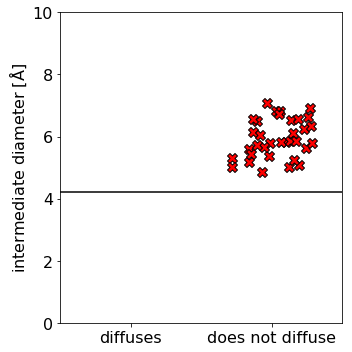

In [11]:
threshold = 4.2
dx = 0.15
fig, ax = plt.subplots(figsize=(5,5))
for name, smile in molecules.items():
    out_file = output_dir+name+'_diam_result.csv'
    if os.path.isfile(out_file) is False:
        continue
    results = pd.read_csv(out_file)
    mid_diam = min(results['diam2'])
    if mid_diam <= threshold:
        C = 'b'
        M = 'o'
        E = 'k'
        D = 0.25
    else:
        C = 'r'
        M = 'X'
        E = 'k'
        D = 0.75
    ax.scatter(D+(dx*(np.random.random() - 0.5) * 2),
               mid_diam, c=C, 
               edgecolors=E, marker=M, alpha=1.0,
               s=100)
    
ax.axhline(y=threshold, c='k')
define_plot_variables(ax,
                      title='',
                      xtitle='',
                      ytitle='intermediate diameter [$\mathrm{\AA}$]',
                      xlim=(0, 1),
                      ylim=(0, 10))
fig.tight_layout()
fig.savefig(output_dir+"categorical.pdf", dpi=720,
            bbox_inches='tight')

## Plot Shapes

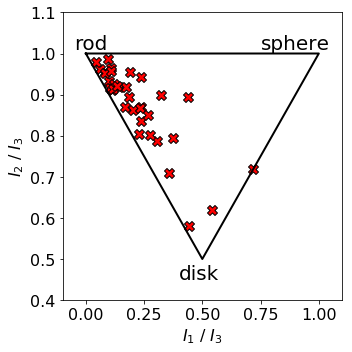

In [12]:
threshold = 4.2
fig, ax = plt.subplots(figsize=(5,5))
for name, smile in molecules.items():
    out_file = output_dir+name+'_diam_result.csv'
    if os.path.isfile(out_file) is False:
        continue
    results = pd.read_csv(out_file)
    mid_diam = min(results['diam2'])
    if mid_diam <= threshold:
        C = 'b'
        M = 'o'
        E = 'k'
        D = 0.25
    else:
        C = 'r'
        M = 'X'
        E = 'k'
        D = 0.75
    ax.scatter(np.average(results['ratio_1']),
               np.average(results['ratio_2']),
               c=C, 
               edgecolors=E, marker=M, alpha=1.0,
               s=100)
    
ax.plot([0, 0.5, 1, 0], [1, 0.5, 1, 1], c='k', lw=2)
ax.text(0.75, 1.01, 'sphere', fontsize=20)
ax.text(0.4, 0.45, 'disk', fontsize=20)
ax.text(-0.05, 1.01, 'rod', fontsize=20)
define_parity_plot_variables(ax,
                             title='',
                             xtitle='$I_1$ / $I_3$',
                             ytitle='$I_2$ / $I_3$',
                             xlim=(-0.1, 1.1),
                             ylim=(0.4, 1.1))
fig.tight_layout()
fig.savefig(output_dir+"shape.pdf", dpi=720,
            bbox_inches='tight')